In [2]:
import cv2
import matplotlib.pyplot as plt
import pathlib as path
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
DATA = path.Path('./data')
DOWNLOAD = DATA/'download'

In [4]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets# defining some widgets
url_widget = widgets.Text(
       placeholder='Unesi URL slike',
       description='URL slike: '
)
url_widget

Text(value='', description='URL slike: ', placeholder='Unesi URL slike')

In [26]:
url = url_widget.value if url_widget.value != '' else 'https://media.istockphoto.com/photos/hot-dog-with-ketchup-picture-id157479378'
url

'https://media.istockphoto.com/photos/hot-dog-with-ketchup-picture-id157479378'

In [31]:
model = load_model(DATA/'final_model.h5')

In [27]:
IMAGE_FILENAME = DOWNLOAD/'slika.jpg'

In [28]:
!wget -O {IMAGE_FILENAME} {url}

--2019-11-15 10:59:50--  https://media.istockphoto.com/photos/hot-dog-with-ketchup-picture-id157479378
Resolving media.istockphoto.com (media.istockphoto.com)... 13.32.114.147, 13.32.114.201, 13.32.114.137, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.32.114.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216314 (211K) [image/jpeg]
Saving to: ‘data/download/slika.jpg’

data/download/slika 100%[===================>] 211.24K  --.-KB/s    in 0.05s   

2019-11-15 10:59:50 (4.30 MB/s) - ‘data/download/slika.jpg’ saved [216314/216314]



### Pokaži sliku

In [29]:
def show_image():
    image_bgr = cv2.imread(IMAGE_FILENAME.as_posix(),cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_resized = cv2.resize(image_rgb, (299, 299), interpolation = cv2.INTER_CUBIC)
    plt.imshow(image_rgb_resized)
    plt.axis("off")
    plt.show()

data/download/slika.jpg


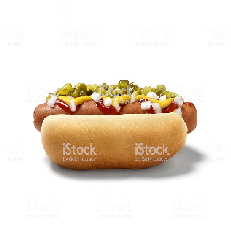

In [30]:
print(IMAGE_FILENAME)
show_image()

### Evaluacija 
![SegmentLocal](data/download/evaluate.gif "segment")

In [32]:
IMG_WIDTH, IMG_HEIGHT = 299, 299
img = image.load_img(IMAGE_FILENAME, target_size = (IMG_WIDTH, IMG_HEIGHT))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
model.predict(img)

ValueError: Error when checking input: expected conv2d_94_input to have shape (8, 8, 2048) but got array with shape (299, 299, 3)